In [1]:
!pip install duckdb

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install jupyter-duckdb

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import duckdb

In [5]:
train_path = '/scratch/namana.s/train.parquet'

con = duckdb.connect()

one_binds = con.query(f"""(SELECT count(*)
                FROM parquet_scan('{train_path}')
                WHERE binds = 1)
""").fetchone()[0]

df_train = con.query(f"""(SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 0
                        ORDER BY random()
                        LIMIT {one_binds})
                        UNION ALL
                        (SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 1)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [6]:
test_path = '/scratch/namana.s/test.parquet'

df_test=con.query(f"""(SELECT *
                        FROM parquet_scan('{test_path}')
                        )""").df()

In [7]:
df_train.count()

id                       3179812
buildingblock1_smiles    3179812
buildingblock2_smiles    3179812
buildingblock3_smiles    3179812
molecule_smiles          3179812
protein_name             3179812
binds                    3179812
dtype: int64

In [8]:
df_test.count()

id                       1674896
buildingblock1_smiles    1674896
buildingblock2_smiles    1674896
buildingblock3_smiles    1674896
molecule_smiles          1674896
protein_name             1674896
dtype: int64

In [9]:
binds_count = con.query(f"""
(SELECT binds, count(*) as binds_count FROM parquet_scan('{train_path}') GROUP BY binds)
""").df()
binds_count

,binds,binds_count
0,0,293656924
1,1,1589906


In [10]:
con.register('df_train', df_train)

binds_count_filtered = con.query("""
    SELECT binds, count(*) as binds_count 
    FROM df_train 
    GROUP BY binds
""").df()

binds_count_filtered.sort_values(by='binds').reset_index(drop=True)

,binds,binds_count
0,0,1589906
1,1,1589906


In [11]:
protein_count = con.query(f"""
(SELECT protein_name, count(*) as protein_name_count FROM parquet_scan('{train_path}') GROUP BY protein_name)
""").df()
protein_count.sort_values(by='protein_name').reset_index(drop=True)

,protein_name,protein_name_count
0,BRD4,98415610
1,HSA,98415610
2,sEH,98415610


In [12]:
protein_count_filtered = con.query(f"""
(SELECT protein_name, count(*) as protein_name_count FROM df_train GROUP BY protein_name)
""").df()
protein_count_filtered

,protein_name,protein_name_count
0,sEH,1253323
1,HSA,939333
2,BRD4,987156


In [13]:
protein_binds = con.query(f"""
(SELECT protein_name, binds, count(*) as binds_per_protein FROM parquet_scan('{train_path}') GROUP BY protein_name, binds)
""").df()
protein_binds.sort_values(by=['protein_name','binds']).reset_index(drop=True)

,protein_name,binds,binds_per_protein
0,BRD4,0,97958646
1,BRD4,1,456964
2,HSA,0,98007200
3,HSA,1,408410
4,sEH,0,97691078
5,sEH,1,724532


In [14]:
protein_binds_filtered = con.query(f"""
(SELECT protein_name, binds, count(*) as binds_per_protein FROM df_train GROUP BY protein_name, binds)
""").df()
protein_binds_filtered.sort_values(by=['protein_name','binds']).reset_index(drop=True)

,protein_name,binds,binds_per_protein
0,BRD4,0,530192
1,BRD4,1,456964
2,HSA,0,530923
3,HSA,1,408410
4,sEH,0,528791
5,sEH,1,724532


In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import seaborn as sns
import matplotlib.pyplot as plt

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

In [8]:
bb1_freq = df_train['buildingblock1_smiles'].value_counts().reset_index().sort_values(by='buildingblock1_smiles', ascending=False).rename({'buildingblock1_smiles': 'bb1'}, axis=1).head(5)
bb2_freq = df_train['buildingblock2_smiles'].value_counts().reset_index().sort_values(by='buildingblock2_smiles', ascending=False).rename({'buildingblock2_smiles': 'bb2'}, axis=1).head(5)
bb3_freq = df_train['buildingblock3_smiles'].value_counts().reset_index().sort_values(by='buildingblock3_smiles', ascending=False).rename({'buildingblock3_smiles': 'bb3'}, axis=1).head(5)

print("Building Block 1 Frequency:\n", bb1_freq)
print("Building Block 2 Frequency:\n", bb2_freq)
print("Building Block 3 Frequency:\n", bb3_freq)

Building Block 1 Frequency:
                                                    bb1  count
171  [N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...   8467
212  O=C(O)[C@H]1Cc2ccccc2CN1C(=O)OCC1c2ccccc2-c2cc...   7484
162  O=C(O)[C@H]1C[C@H](O)CN1C(=O)OCC1c2ccccc2-c2cc...   8724
205      O=C(O)[C@H]1COCCN1C(=O)OCC1c2ccccc2-c2ccccc21   7692
183        O=C(O)[C@H]1CCN1C(=O)OCC1c2ccccc2-c2ccccc21   8173
Building Block 2 Frequency:
                         bb2  count
281       Nc1noc2ccc(F)cc12   4359
18                 Nc1nncs1  12463
584             Nc1nnc(S)s1   2189
64              Nc1ncncc1Br   6825
683  Nc1ncnc2c1ncn2C1CCCCO1   1313
Building Block 3 Frequency:
                    bb3  count
659  Nc1noc2ccc(F)cc12   1545
13         Nc1nnn[nH]1  11288
238           Nc1nncs1   4634
266        Nc1nnc(S)s1   4310
852        Nc1ncncc1Br    171


In [9]:
def plot_mols(df, mol_count, col_name):
    df2=df.reset_index(drop=True)
    mols = []
    for i in range(mol_count):
        mols+=[Chem.MolFromSmiles(df2[col_name][i])]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(400,300))

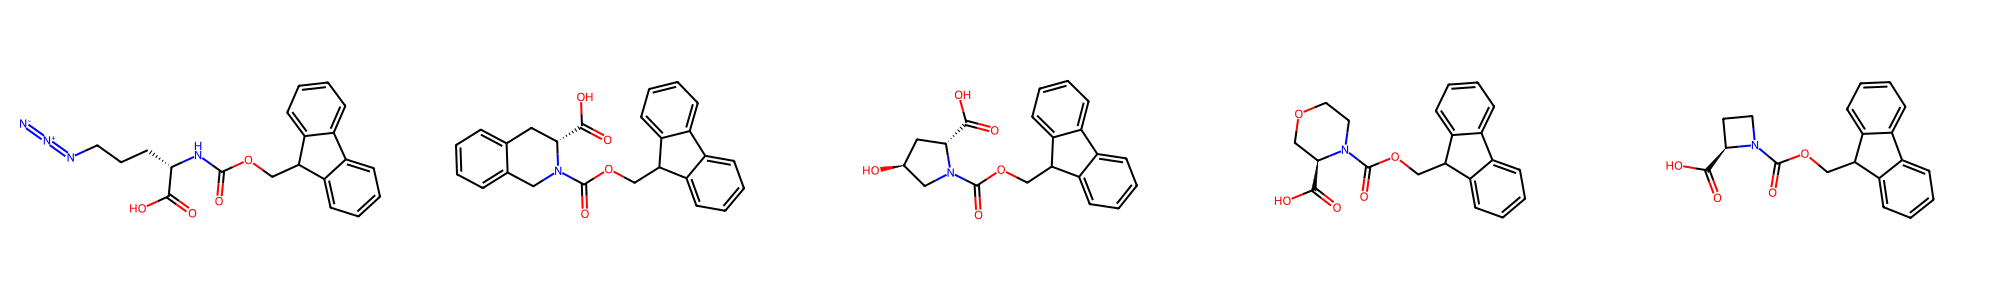

In [10]:
plot_mols(bb1_freq, 5, 'bb1')

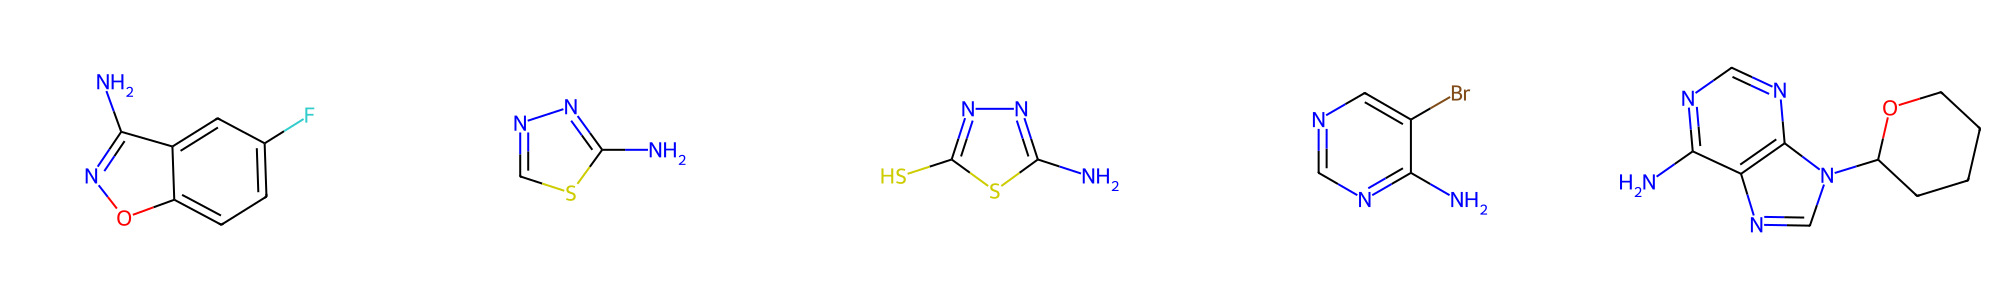

In [11]:
plot_mols(bb2_freq, 5, 'bb2')

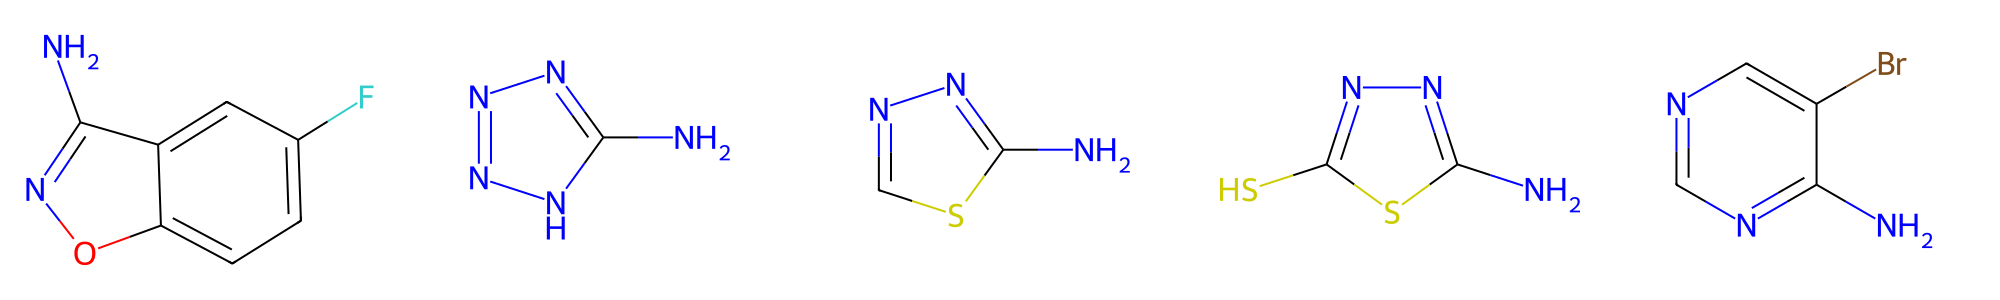

In [12]:
plot_mols(bb3_freq, 5, 'bb3')

In [13]:
df_train['bb1_length'] = df_train['buildingblock1_smiles'].apply(len)
df_train['bb2_length'] = df_train['buildingblock2_smiles'].apply(len)
df_train['bb3_length'] = df_train['buildingblock3_smiles'].apply(len)
df_train['molecule_length'] = df_train['molecule_smiles'].apply(len)

In [22]:
df_train

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,bb1_length,bb2_length,bb3_length,molecule_length
0,256581404,O=C(O)C[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)c1c...,Cl.NCC12CC3CC(CC(C3)C1)C2,NCc1ccc(C(=O)N2CCCC2)cc1,O=C(C[C@@H](Nc1nc(NCc2ccc(C(=O)N3CCCC3)cc2)nc(...,sEH,0,61,25,24,96
1,95155626,O=C(N[C@@H](Cc1ccc(Cl)c(Cl)c1)C(=O)O)OCC1c2ccc...,Cc1cc(N)nn1C,Nc1n[nH]c2cc(Cl)ccc12,Cc1cc(Nc2nc(Nc3n[nH]c4cc(Cl)ccc34)nc(N[C@@H](C...,BRD4,0,59,12,21,81
2,294061496,O=C(O)[C@H]1Cc2ccccc2CN1C(=O)OCC1c2ccccc2-c2cc...,Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,Nc1nc(Cl)c(C=O)c(Cl)n1,O=Cc1c(Cl)nc(Nc2nc(Nc3cccc4c3CN(C3CCC(=O)NC3=O...,sEH,0,51,32,22,93
3,176261073,O=C(Nc1cc(F)ccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1cc(Cl)ccc1F,Cl.Cl.NCCCN1CCNC(=O)C1,O=C1CN(CCCNc2nc(Nc3cc(Cl)ccc3F)nc(Nc3cc(F)ccc3...,BRD4,0,45,14,22,64
4,70801053,N#Cc1cccc(C[C@H](CC(=O)O)NC(=O)OCC2c3ccccc3-c3...,Nc1ncccc1F,CCOc1cc(N)ccn1,CCOc1cc(Nc2nc(Nc3ncccc3F)nc(N[C@@H](CC(=O)N[Dy...,BRD4,0,56,10,14,70
...,...,...,...,...,...,...,...,...,...,...,...
3179807,295243165,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nnc(S)s1,NCc1cnc(-c2ccccc2)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cnc(-c3ccccc3)s2...,HSA,1,55,11,20,75
3179808,295243852,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cc1cc(N)n[nH]1,Cc1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,HSA,1,55,8,14,67
3179809,295244088,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cl.Cn1cc(N)ccc1=O,Cn1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,BRD4,1,55,8,17,67
3179810,295244440,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,NCCc1nccc(C2CC2)n1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCCc2nccc(C3CC3)n2)n...,HSA,1,55,8,18,70


In [14]:
df_train[['buildingblock1_smiles','bb1_length','binds']].groupby(['buildingblock1_smiles','bb1_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
buildingblock1_smiles,bb1_length,
O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,45,260846
O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,53,164425
CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,43,36478
CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,50,32566
O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,46,30457
...,...,...
O=C(Nc1c(Cl)c(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c2ccccc21,54,55
O=C(Nc1cc(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c2ccccc21,50,51
O=C(Nc1c(Br)cc(C(=O)O)cc1Br)OCC1c2ccccc2-c2ccccc21,50,45


In [15]:
df_train[['buildingblock2_smiles','bb2_length','binds']].groupby(['buildingblock2_smiles','bb2_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
buildingblock2_smiles,bb2_length,
Cl.Cl.NCc1cncc(F)c1,19,64213
Nc1cc(N2CCNCC2)ccc1[N+](=O)[O-],31,56276
Cl.NCc1cnc2n1CCOC2,18,30862
NCCC1CSC1,9,28190
CCOC(=O)c1ncccc1N,17,26121
...,...,...
Cl.Nc1ccc2cccnc2c1,18,226
Cl.NCC1CC12CCOCC2,17,212
Nc1ccc2cc(Br)ccc2c1,19,160


In [16]:
df_train[['buildingblock3_smiles','bb3_length','binds']].groupby(['buildingblock3_smiles','bb3_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
buildingblock3_smiles,bb3_length,
Cc1cc2cc(CN)ccc2[nH]1,21,58844
Cl.Cn1cc(N)ccc1=O,17,34174
Cl.Cl.NCc1cncc(F)c1,19,22707
Nc1ccc2c(c1)CNC2=O,18,16993
Cl.NCC12CC3CC(CC(C3)C1)C2,25,15130
...,...,...
Cl.N#CC1(NC(=O)CN)CC1,21,26
Nc1ncccc1CO,11,23
Nc1ccc(O)cn1,12,13


In [17]:
df_train[['id','molecule_length','binds']].groupby(['id','molecule_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
id,molecule_length,
82709162,59,1
82803671,65,1
82803707,79,1
82803704,62,1
82803701,83,1
...,...,...
124997114,73,0
124997086,74,0
124997000,69,0


In [18]:
correlation_lengths = df_train[['bb1_length', 'bb2_length', 'bb3_length', 'molecule_length', 'binds']].corr()

print("Correlation between molecule lengths and binds:\n", correlation_lengths)

Correlation between molecule lengths and binds:
                  bb1_length  bb2_length  bb3_length  molecule_length     binds
bb1_length         1.000000    0.015424    0.008511         0.574832 -0.084591
bb2_length         0.015424    1.000000   -0.000704         0.557588  0.007767
bb3_length         0.008511   -0.000704    1.000000         0.534697  0.000994
molecule_length    0.574832    0.557588    0.534697         1.000000 -0.047254
binds             -0.084591    0.007767    0.000994        -0.047254  1.000000


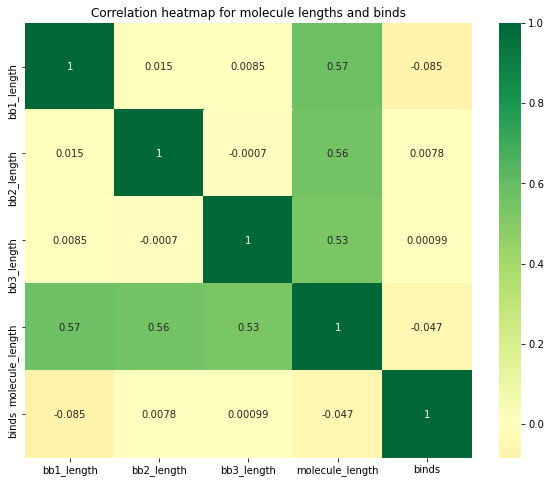

In [19]:
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_lengths, annot=True, cmap="RdYlGn", center=0)
# Add title
plt.title('Correlation heatmap for molecule lengths and binds')

# Show the heatmap
plt.show()

In [20]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from rdkit import Chem
from joblib import Parallel, delayed
import pandas as pd

# Define the function for parallel processing
def smiles_to_mol(smiles):
    return Chem.MolFromSmiles(smiles)

# Use joblib's Parallel to convert SMILES in parallel
df_train['molecule'] = Parallel(n_jobs=-1)(delayed(smiles_to_mol)(smiles) for smiles in df_train['molecule_smiles'])

In [22]:
from tqdm import tqdm

# Define the fingerprint generation function
def generate_ecfp(molecule, radius=2, bits=1024):
    if molecule is None:
        return None
    return list(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=radius, nBits=bits))

# Use tqdm for progress tracking
tqdm.pandas()

# Use Parallel with joblib to process fingerprints in parallel
df_train['ecfp'] = Parallel(n_jobs=-1)(delayed(generate_ecfp)(mol) for mol in tqdm(df_train['molecule']))

100%|██████████| 3179812/3179812 [12:13<00:00, 4334.48it/s] 


In [32]:
df_train

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,bb1_length,bb2_length,bb3_length,molecule_length,molecule,ecfp
0,256581404,O=C(O)C[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)c1c...,Cl.NCC12CC3CC(CC(C3)C1)C2,NCc1ccc(C(=O)N2CCCC2)cc1,O=C(C[C@@H](Nc1nc(NCc2ccc(C(=O)N3CCCC3)cc2)nc(...,sEH,0,61,25,24,96,<rdkit.Chem.rdchem.Mol object at 0x2b45093cc540>,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,95155626,O=C(N[C@@H](Cc1ccc(Cl)c(Cl)c1)C(=O)O)OCC1c2ccc...,Cc1cc(N)nn1C,Nc1n[nH]c2cc(Cl)ccc12,Cc1cc(Nc2nc(Nc3n[nH]c4cc(Cl)ccc34)nc(N[C@@H](C...,BRD4,0,59,12,21,81,<rdkit.Chem.rdchem.Mol object at 0x2b45093cc040>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,294061496,O=C(O)[C@H]1Cc2ccccc2CN1C(=O)OCC1c2ccccc2-c2cc...,Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,Nc1nc(Cl)c(C=O)c(Cl)n1,O=Cc1c(Cl)nc(Nc2nc(Nc3cccc4c3CN(C3CCC(=O)NC3=O...,sEH,0,51,32,22,93,<rdkit.Chem.rdchem.Mol object at 0x2b45093c2b30>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,176261073,O=C(Nc1cc(F)ccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1cc(Cl)ccc1F,Cl.Cl.NCCCN1CCNC(=O)C1,O=C1CN(CCCNc2nc(Nc3cc(Cl)ccc3F)nc(Nc3cc(F)ccc3...,BRD4,0,45,14,22,64,<rdkit.Chem.rdchem.Mol object at 0x2b45093cc270>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,70801053,N#Cc1cccc(C[C@H](CC(=O)O)NC(=O)OCC2c3ccccc3-c3...,Nc1ncccc1F,CCOc1cc(N)ccn1,CCOc1cc(Nc2nc(Nc3ncccc3F)nc(N[C@@H](CC(=O)N[Dy...,BRD4,0,56,10,14,70,<rdkit.Chem.rdchem.Mol object at 0x2b45093c2b80>,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179807,295243165,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nnc(S)s1,NCc1cnc(-c2ccccc2)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cnc(-c3ccccc3)s2...,HSA,1,55,11,20,75,<rdkit.Chem.rdchem.Mol object at 0x2b462d715770>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3179808,295243852,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cc1cc(N)n[nH]1,Cc1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,HSA,1,55,8,14,67,<rdkit.Chem.rdchem.Mol object at 0x2b462d715720>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3179809,295244088,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cl.Cn1cc(N)ccc1=O,Cn1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,BRD4,1,55,8,17,67,<rdkit.Chem.rdchem.Mol object at 0x2b462d7156d0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3179810,295244440,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,NCCc1nccc(C2CC2)n1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCCc2nccc(C3CC3)n2)n...,HSA,1,55,8,18,70,<rdkit.Chem.rdchem.Mol object at 0x2b462d715680>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [23]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train['binds'].tolist(), test_size=0.2, random_state=42)

In [26]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
from tqdm import tqdm
#from tqdm.notebook import tqdm  # For progress bar

# OneHotEncode the 'protein_name' column
onehot_encoder = OneHotEncoder(sparse=False)  # Use sparse=False for dense matrix

/home/namana.s/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [28]:
protein_onehot_sub = onehot_encoder.fit_transform(X_train_sub['protein_name'].values.reshape(-1, 1))

In [29]:
protein_onehot_val = onehot_encoder.transform(X_val['protein_name'].values.reshape(-1, 1))

In [30]:
def batch_generator(df, protein_onehot, batch_size=100000):
    n = len(df)
    for i in range(0, n, batch_size):
        X_batch = ([ecfp + list(protein) for ecfp, protein in zip(df['ecfp'].tolist()[i:i+batch_size], protein_onehot[i:i+batch_size])])
        y_batch = df['binds'].tolist()[i:i+batch_size]        
        yield np.array(X_batch), np.array(y_batch)

In [42]:
from tqdm import tqdm  # For the progress bar

print("Progress bars for Batch and Parallel processing")
# Initialize the RandomForestClassifier model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    xgb_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(xgb_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of XGBoost Classifier: {map_score:.2f}")

  0%|          | 0/21 [00:00<?, ?it/s]

Progress bars for Batch and Parallel processing


100%|██████████| 6/6 [01:22<00:00, 13.67s/it]


Mean Average Precision (mAP) of XGBoost Classifier: 0.96


In [44]:
print("Progress bars for Batch and Parallel processing")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    rf_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(rf_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of Random Forest Classifier: {map_score:.2f}")

  0%|          | 0/21 [00:00<?, ?it/s]

Progress bars for Batch and Parallel processing


100%|██████████| 6/6 [01:29<00:00, 14.91s/it]


Mean Average Precision (mAP) of Random Forest Classifier: 0.96


In [45]:
print("Progress bars for Batch and Parallel processing")
catboost_model = CatBoostClassifier(iterations=100, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    catboost_model.fit(X_batch, y_batch, verbose=0)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(catboost_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of CatBoost Classifier: {map_score:.2f}")

  0%|          | 0/21 [00:00<?, ?it/s]

Progress bars for Batch and Parallel processing


100%|██████████| 6/6 [04:23<00:00, 43.96s/it]


Mean Average Precision (mAP) of CatBoost Classifier: 0.96


In [46]:
print("Progress bars for Batch and Parallel processing")
lr_model = LogisticRegression(max_iter=10000, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    lr_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(lr_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of Logistic Regression: {map_score:.2f}")

  0%|          | 0/21 [00:00<?, ?it/s]

Progress bars for Batch and Parallel processing


100%|██████████| 6/6 [01:00<00:00, 10.10s/it]


Mean Average Precision (mAP) of Logistic Regression: 0.93


In [31]:
protein_onehot_train = onehot_encoder.fit_transform(X_train['protein_name'].values.reshape(-1, 1))

In [32]:
protein_onehot_test = onehot_encoder.transform(X_test['protein_name'].values.reshape(-1, 1))

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=10000, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
catboost_model = CatBoostClassifier(iterations=100, random_state=42)

In [35]:
print("Progress bar for Batch processing")
for X_batch, y_batch in tqdm(batch_generator(X_train, protein_onehot_train), total=len(X_train)//100000+1):
    rf_model.fit(X_batch, y_batch)
    xgb_model.fit(X_batch, y_batch)
    lr_model.fit(X_batch, y_batch)
    catboost_model.fit(X_batch, y_batch, verbose=0)

  0%|          | 0/26 [00:00<?, ?it/s]

Progress bar for Batch processing


100%|██████████| 26/26 [1:41:33<00:00, 234.36s/it]


In [36]:
print("Progress bar for Parallel processing")
rf_probabilities=[]
xgb_probabilities=[]
lr_probabilities=[]
catboost_probabilities=[]
for X_batch, y_batch in tqdm(batch_generator(X_test, protein_onehot_test), total=len(X_test)//100000+1):
    rf_probabilities.extend(rf_model.predict_proba(X_batch)[:, 1])
    xgb_probabilities.extend(xgb_model.predict_proba(X_batch)[:, 1])
    lr_probabilities.extend(lr_model.predict_proba(X_batch)[:, 1])
    catboost_probabilities.extend(catboost_model.predict_proba(X_batch)[:, 1])

  0%|          | 0/7 [00:00<?, ?it/s]

Progress bar for Parallel processing


100%|██████████| 7/7 [05:50<00:00, 50.10s/it]


In [37]:
ensemble_probabilities = np.array([rf_probabilities, xgb_probabilities, lr_probabilities, catboost_probabilities])

final_probabilities = np.mean(ensemble_probabilities, axis=0)

map_score = average_precision_score(y_test, final_probabilities)

print(f"Mean Average Precision (mAP): {map_score:.4f}")

Mean Average Precision (mAP): 0.9684
